In [1]:
## Insert all the imports up here

import pandas as pd
import matplotlib.pyplot as plt
import numpy
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
## Import Travel Data

travelData = pd.read_csv('/home/souvik/Repos/Datasets/airline-passengers.csv', index_col=0, parse_dates=True)
travelData.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
travelData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


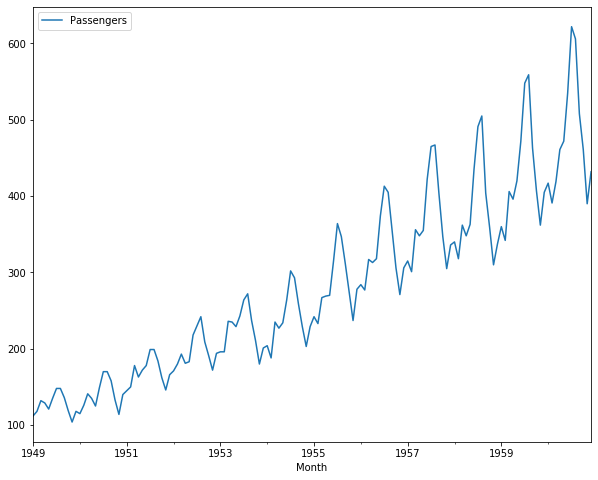

In [4]:
## Plot the data

travelData.plot(figsize=(10, 8))

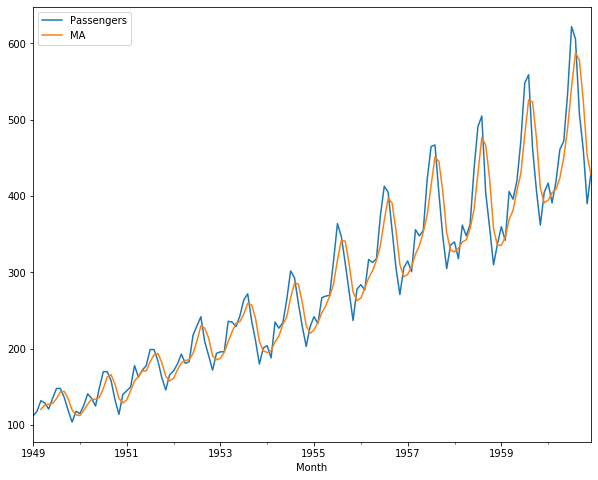

In [5]:
## Moving average of data

travelData['MA'] = travelData['Passengers'].rolling(3).mean()
travelData.plot(figsize=(10, 8))

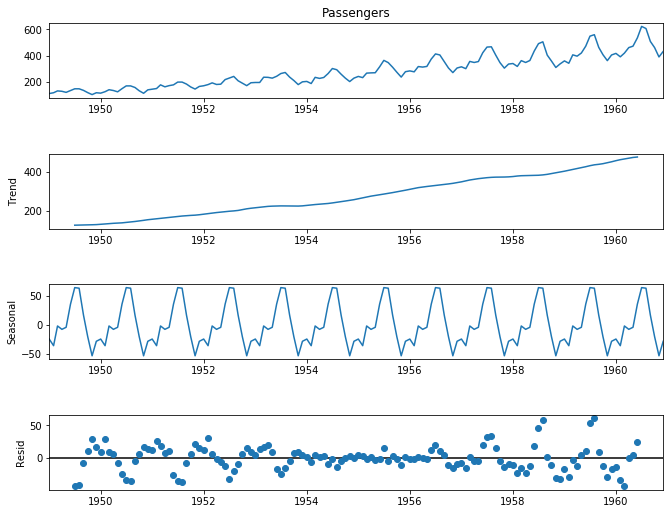

In [6]:
## Seasonal decomposition of data

s_decomp = seasonal_decompose(travelData['Passengers'])
result = s_decomp.plot()
result.set_size_inches((10, 8))

In [7]:
## Apply Augmented Dickey-Fuller Test

adf = adfuller(travelData['Passengers'])
print('Adf statistic: %f' % adf[0])

Adf statistic: 0.815369


## As adf > 0.05, data is non-stationary

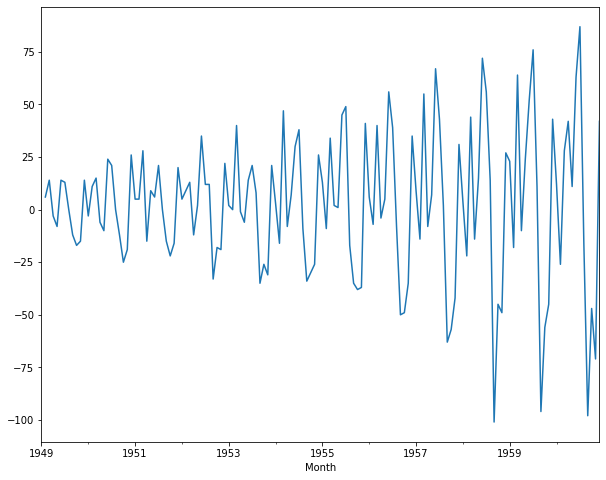

In [8]:
travelData['First Diff'] = travelData['Passengers'] - travelData['Passengers'].shift(1)
travelData['First Diff'].plot(figsize=(10,8))

In [9]:
adf = adfuller(travelData['First Diff'].dropna())
print('Adf statistic: %f' % adf[0])

Adf statistic: -2.829267


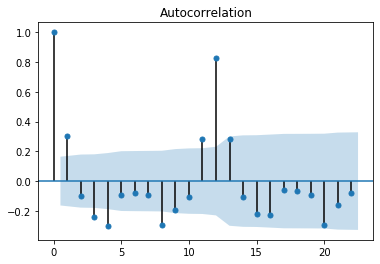

In [10]:
acf = plot_acf(travelData['First Diff'].dropna())

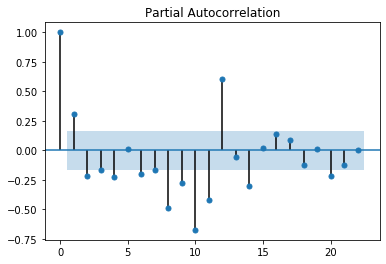

In [11]:
pacf = plot_pacf(travelData['First Diff'].dropna())

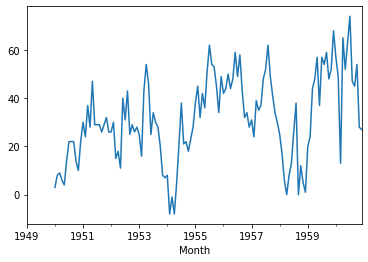

In [12]:
travelData['Seasonal First Diff'] = travelData['Passengers'] - travelData['Passengers'].shift(12)
travelData['Seasonal First Diff'].plot()

In [13]:
adf = adfuller(travelData['Seasonal First Diff'].dropna())
print('Adf statistic: %f' % adf[0])

Adf statistic: -3.383021


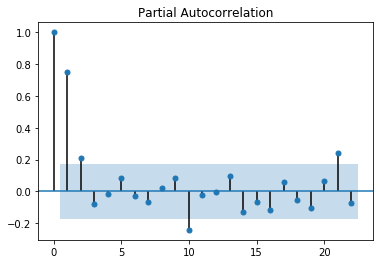

In [14]:
pacf = plot_pacf(travelData['Seasonal First Diff'].dropna())

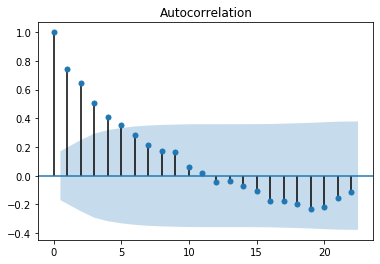

In [15]:
acf = plot_acf(travelData['Seasonal First Diff'].dropna())

In [16]:
test_start, test_end = '1949-01-01', '1958-12-01'
exp_start, exp_end = '1959-01-01', '1960-12-01'

In [17]:
test = travelData['Passengers'][test_start:test_end]

In [18]:
exp = travelData['Passengers'][exp_start:exp_end]

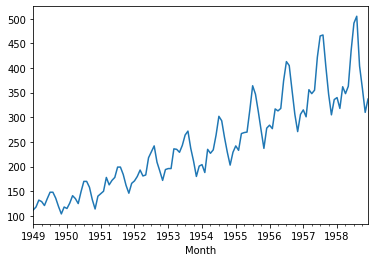

In [19]:
test.plot()

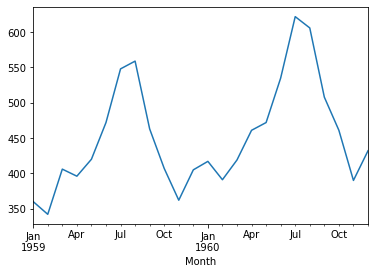

In [20]:
exp.plot()

In [22]:
# p = 1, d = 1, q = 1
# sp  = 1, d = 1, q = 5
model=sm.tsa.statespace.SARIMAX(test, order=(1,1,1), seasonal_order=(2,1,5,12))

/home/souvik/anaconda3/envs/tsa/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/souvik/anaconda3/envs/tsa/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [23]:
result = model.fit()

/home/souvik/anaconda3/envs/tsa/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/souvik/anaconda3/envs/tsa/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


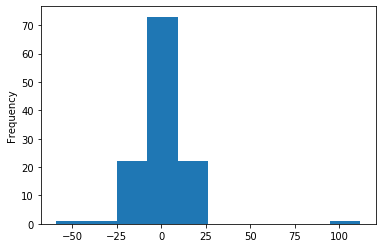

In [28]:
result.resid.plot(kind='hist')

In [25]:
prediction = result.predict(start=exp_start, end=exp_end)

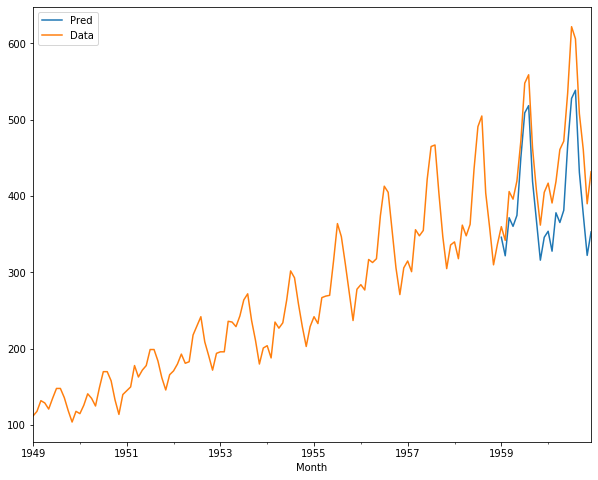

In [26]:
prediction.plot(figsize=(10, 8), label='Pred')
travelData['Passengers'].plot(label='Data')
plt.legend()